In [1]:
import pickle

from hyperparams_searcher import HyperparamsSearcher
from storage import Storage
from helper import plot_results, get_dataloaders, display_formatted_results

In [3]:
with open(Storage.TEST_WV_WRAPPER_FILENAME, "rb") as file:
    wv_wrapper = pickle.load(file)

In [5]:
wv = wv_wrapper["wv"]
data_dir = "dataset1"
data_types = {"train": "train2017", "val": "val2017"}
path = "test_models_weights"

In [6]:
dataloaders = get_dataloaders(data_dir, data_types, wv)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


iteration 0
rate_r: -1.1172148337649253, gamma_r: -0.6795093116807536
Epoch 0/2
----------
train Loss: 4.8071 Acc: 0.0000
val Loss: 3.6478 Acc: 1.0000

Epoch 1/2
----------
train Loss: 4.1886 Acc: 1.0000
val Loss: 3.3690 Acc: 1.0000

Epoch 2/2
----------
train Loss: 4.1249 Acc: 1.0000
val Loss: 3.3356 Acc: 1.0000

Training complete in 0m 40s
Best val Acc: 1.000000
validation accuracy:1,train_loss:4.1249231974283855,rate_r:-1.1172148337649253,gamma_r:-0.6795093116807536
iteration 1
rate_r: -0.980155578632635, gamma_r: -5.069242606239303
Epoch 0/2
----------
train Loss: 4.8443 Acc: 0.0000
val Loss: 3.8242 Acc: 0.0000

Epoch 1/2
----------
train Loss: 4.3299 Acc: 0.0000
val Loss: 3.8281 Acc: 0.0000

Epoch 2/2
----------
train Loss: 4.3132 Acc: 0.0000
val Loss: 3.8257 Acc: 0.0000

Training complete in 0m 40s
Best val Acc: 0.000000
validation accuracy:0,train_loss:4.313198661804199,rate_r:-0.980155578632635,gamma_r:-5.069242606239303
iteration 2
rate_r: -2.2410864186850254, gamma_r: -1.5267

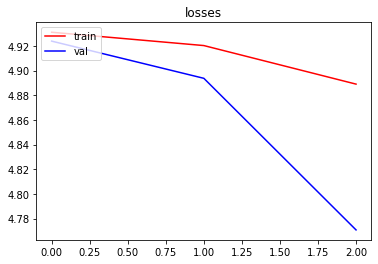

In [7]:
hyperparams_searcher = HyperparamsSearcher(dataloaders, wv_wrapper, path)
rate_r_range = (-5, 0)
gamma_r_range = (-6, -3)
result = hyperparams_searcher.find_hyperparams(rate_r_range, gamma_r_range)
best_val, best_model, best_stats, results = result
plot_results(best_stats["losses"], "losses")

rate_r:-4.874546768087214, gamma_r:0.26648693167734994: val_accuracy:0, train_loss:4.9263871510823565, lr:1.3349138282883844e-05, gamma:1.847085213570871


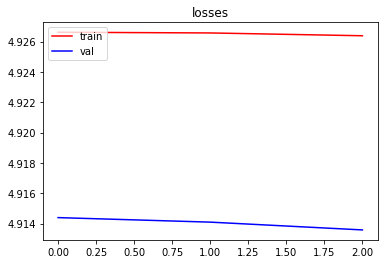

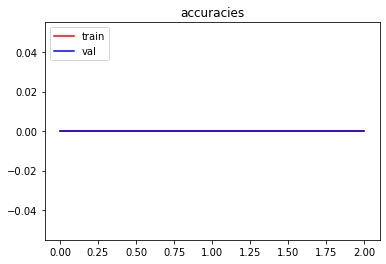

rate_r:-3.7318693129214795, gamma_r:-4.441346598552379: val_accuracy:0, train_loss:4.919598897298177, lr:0.00018540894685928065, gamma:3.6195401751261776e-05


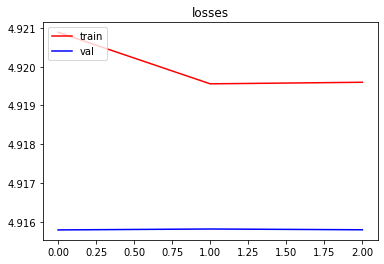

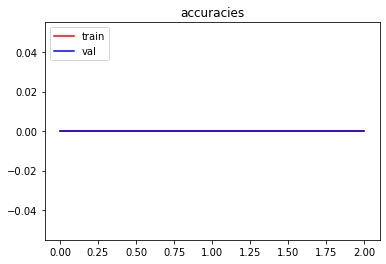

rate_r:-3.717610967265607, gamma_r:-1.4631941188949433: val_accuracy:1, train_loss:4.922745037078857, lr:0.00019159714473112102, gamma:0.03441960492519419


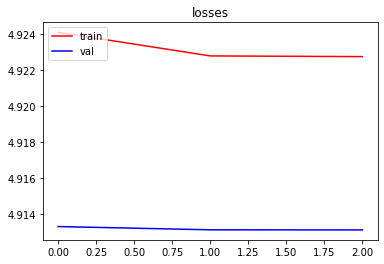

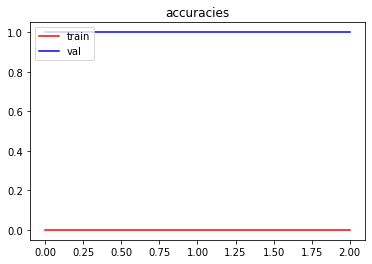

rate_r:-3.08952871823724, gamma_r:0.42686745760996825: val_accuracy:4, train_loss:4.888990497589111, lr:0.000813713051259961, gamma:2.6721907579566166


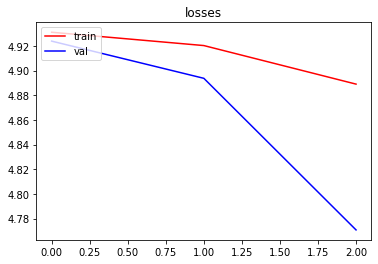

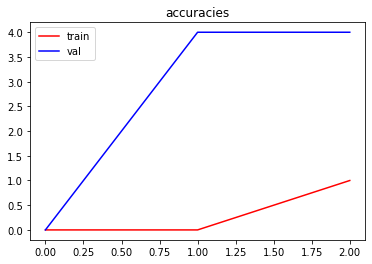

rate_r:-2.3471314757933768, gamma_r:-0.3404828053477349: val_accuracy:1, train_loss:4.834204324086508, lr:0.004496437117565093, gamma:0.4565803268411673


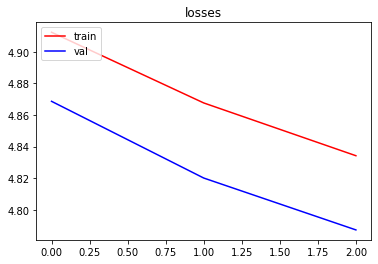

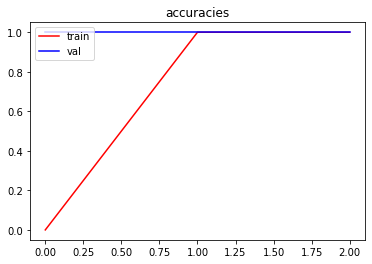

rate_r:-2.2410864186850254, gamma_r:-1.5267644191429204: val_accuracy:1, train_loss:4.861287053426107, lr:0.005740022322186534, gamma:0.029732784343088844


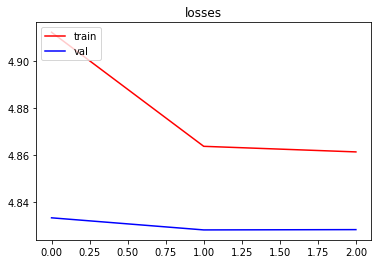

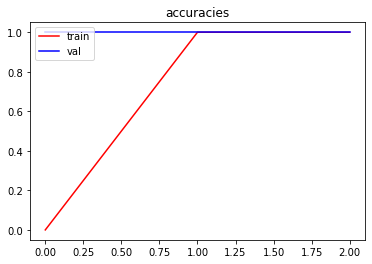

rate_r:-1.6650272548516698, gamma_r:-5.259848558156929: val_accuracy:1, train_loss:4.504722150166829, lr:0.021625828030916415, gamma:5.49732536423627e-06


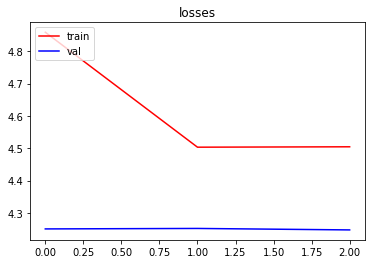

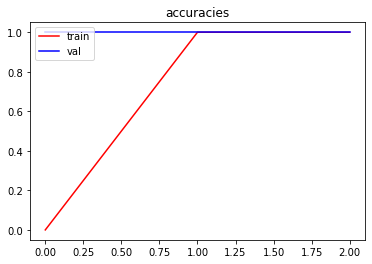

rate_r:-1.1172148337649253, gamma_r:-0.6795093116807536: val_accuracy:1, train_loss:4.1249231974283855, lr:0.07634580280607745, gamma:0.20916580595127718


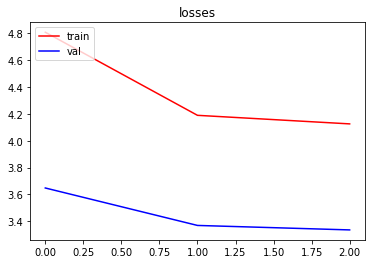

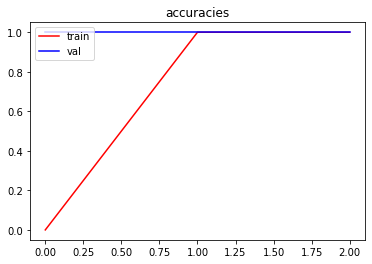

rate_r:-0.980155578632635, gamma_r:-5.069242606239303: val_accuracy:0, train_loss:4.313198661804199, lr:0.10467534991890107, gamma:8.526236870272133e-06


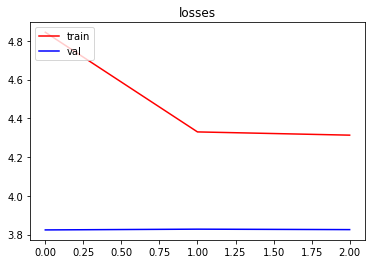

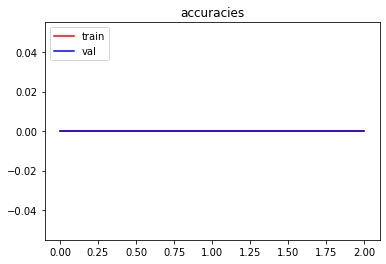

rate_r:0.3273198804715074, gamma_r:0.1686073281795899: val_accuracy:0, train_loss:111.69640502929687, lr:2.1248089180471967, gamma:1.4743728610609788


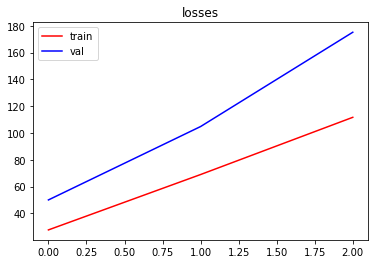

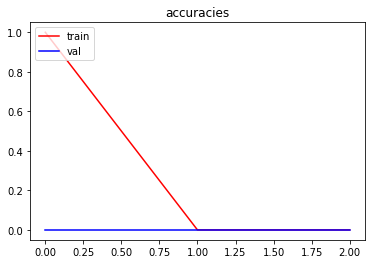

best validation accuracy achieved during cross-validation: 4


In [8]:
display_formatted_results(results)
print("best validation accuracy achieved during cross-validation: {}".format(best_val))